In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
# Load the IMDB dataset
imdb = keras.datasets.imdb

In [3]:
# Split the dataset into training and testing sets
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
# Preprocess the data by padding the sequences
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=0, padding='post', maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=0, padding='post', maxlen=256)

Define the model architecture using an Embedding layer, a GlobalAveragePooling1D layer, and two Dense layers. The Embedding layer learns a dense representation of the input sequences, the GlobalAveragePooling1D layer averages over the sequence dimension to generate a fixed-length output vector, and the two Dense layers perform classification.

In [5]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Embedding(10000, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=512, validation_data=(test_data, test_labels))

Epoch 1/10
49/49 [==============================] - 3s 42ms/step - loss: 0.6905 - accuracy: 0.5975 - val_loss: 0.6861 - val_accuracy: 0.6983
Epoch 2/10
49/49 [==============================] - 2s 32ms/step - loss: 0.6742 - accuracy: 0.7366 - val_loss: 0.6594 - val_accuracy: 0.7492
Epoch 3/10
49/49 [==============================] - 2s 31ms/step - loss: 0.6311 - accuracy: 0.7748 - val_loss: 0.6052 - val_accuracy: 0.7772
Epoch 4/10
49/49 [==============================] - 2s 32ms/step - loss: 0.5616 - accuracy: 0.8089 - val_loss: 0.5344 - val_accuracy: 0.8067
Epoch 5/10
49/49 [==============================] - 2s 32ms/step - loss: 0.4834 - accuracy: 0.8395 - val_loss: 0.4661 - val_accuracy: 0.8318
Epoch 6/10
49/49 [==============================] - 2s 33ms/step - loss: 0.4151 - accuracy: 0.8611 - val_loss: 0.4128 - val_accuracy: 0.8499
Epoch 7/10
49/49 [==============================] - 2s 35ms/step - loss: 0.3633 - accuracy: 0.8757 - val_loss: 0.3759 - val_accuracy: 0.8578
Epoch 8/10
49

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 3ms/step - loss: 0.3191 - accuracy: 0.8720
Test accuracy: 0.8719599843025208


In [9]:
# Make predictions on the testing data
y_pred = np.round(model.predict(test_data)).flatten()

# Generate the confusion matrix and classification report
cm = confusion_matrix(test_labels, y_pred)
report = classification_report(test_labels, y_pred)

782/782 [==============================] - 2s 3ms/step


In [10]:
# Print the confusion matrix and classification report
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Confusion Matrix:
 [[10788  1712]
 [ 1489 11011]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     12500
           1       0.87      0.88      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



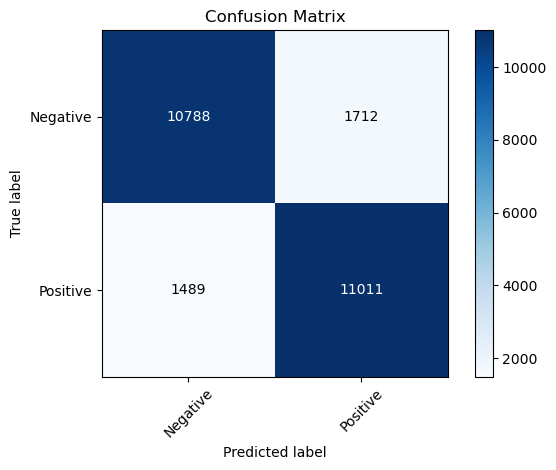

In [11]:
# Define the plot labels
classes = ["Negative", "Positive"]

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()